# ENPH 213 - Week 9 Lab

In this lab, we will be working on numerically solving ordinary differential equations and continuing to develop your Python skills.

When you are finished, please rename this notebook to LastName_ENPH213_Lab9, where LastName is your last name.  Submit that file to onQ.

For marking Parts 1-4 will be marked together (Weighted out of 10) and Part 5 (if delivered) will be marked out of 5.

In [1]:
import numpy as np
import cmath as cm
import math as m
from matplotlib import pyplot as plt
%matplotlib inline

# Part 1

Consider the ordinary differential equation:

$\large \frac{dy}{dx} = -\frac{xy}{4}$

Solve numerically for y(x) for $-8 \leq x \leq 8$ with an intial condition that $y(0) = 1$.  

In solving this problem, develop code using Euler's method for positive $x$ (Forward) and negative $x$ (Backward).  Using 101 points in each region (positive $x$ and negative $x$), plot the curves on a single graph.

Then starting wit 101 points, use your code for the Backward Euler's method to test covergence.  Determine the number of points needed to satisfy this convergence condition:

$\Large \frac{\sum_i^{N+1} y(x_i)}{N+1} - \frac{\sum_i^N y(x_i)}{N} < 1 \times10^{-6}$


Points: 101


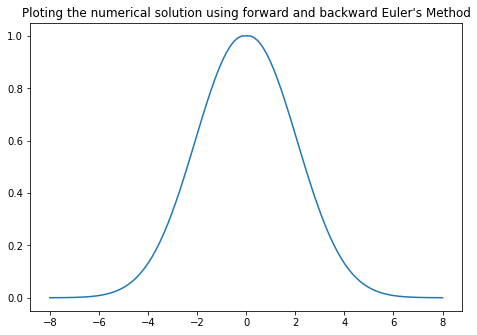

In [2]:
# define the eqn
def fxy (x,y):
    return -x*y/4


# define a function to take in the given equation, the number of points and 
# use Euler's method for positive  𝑥  (Forward) and negative  𝑥  (Backward) and plot the curve
# *** This is a general function, a broken up one can be seen later ***
def ODE (N, func): 
    xpts = np.linspace(-8,8,N) # defining the x range
    #print(xpts) 
    h = (xpts[-1]-xpts[0])/(N-1) # cal h
    
    middle = N//2 #find the middle of range
    #print(middle)
    #print(xpts[middle])

    ypts = np.zeros(N) # initalize y 
    ypts[middle] = 1   # condition
    
    for i in range(middle+1,N): #Forward Euler Method
        ypts[i]=ypts[i-1]+h*func(xpts[i-1], ypts[i-1])
        
    for i in range (middle,0,-1): #Backward Euler Method
        ypts[i-1]=ypts[i]-h*func(xpts[i], ypts[i])
    
    print("Points:", N)
    fig=plt.figure()# Create a figure object
    ax=fig.add_axes([0,0,1,1])# Adds axes, box at 0,0 with 100% length and␣,→width
    ax.plot(xpts,ypts)
    plt.title("Ploting the numerical solution using forward and backward Euler's Method")
    return xpts, ypts

x, y = ODE(101, fxy)



$\Large \frac{\sum_i^{N+1} y(x_i)}{N+1} - \frac{\sum_i^N y(x_i)}{N} < 1 \times10^{-6}$

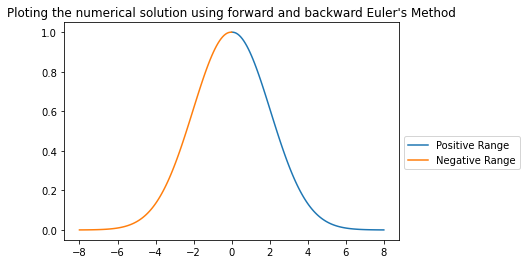

In [3]:
# ** This is where I break down the euler method into Forward and Back functions to help find convergence **
# forward euler Method, N points, f-function, y0 is the condition for y[0]
def Forward(N, f, y0):
    x = np.linspace(0, 8, N) # define x range
    y = np.zeros(N) #initalize y
    y[0] = y0 # y condition
    
    h = (x[-1] - x[0])/(N-1) # calc h
    
    for i in range(1, N): # start at index 1, to avoid overwriting the condition
        y[i] = y[i-1] + f(x[i-1], y[i-1])*h #calc y

    return x, y

# backward euler method, used for convergence calc
def Backward(N, f):
    x = np.linspace(-8, 0, N) # define x range
    
    y = np.zeros(N) #initalize y
    y[-1] = 1 # y condition
    
    h = (x[-1] - x[0])/(N-1) # calc h

    for i in range(N-1, 0, -1): # loop backwards through y
        y[i-1] = y[i] - f(x[i], y[i])*h #calc y

    return x, y

# call the functions
posx, posy = Forward(101, fxy, 1) 
negx, negy = Backward(101, fxy)

# plot the new positive negative method, to check
plt.plot(posx, posy, label='Positive Range')
plt.plot(negx, negy, label='Negative Range')
plt.title("Ploting the numerical solution using forward and backward Euler's Method")
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

In [4]:
# function to find the convergence, given a certain N value and a function
def Bconvergence(N, func):
    difference = 1 #set the difference to 1
   
    #print("N\t Difference") # test print
    while (difference >= 10**-6): # conditional loop
        xpts = np.linspace(-8,0,N) # x-range
        ypts = Backward(N,func) # calc y for N
        
        ypts1 = Backward(N+1,func) # calc y for N+1
        
        # sum divided by N for each set
        sum0 = np.sum(ypts)/N
        sum1 = np.sum(ypts1)/(N+1)
        
        difference = abs(sum1-sum0) # calc diff
        #print(N,"\t", difference) # test print
        
        N+=1
    return N-1 #N-1, since N is incremented after diff calc
        
print("\nNumber of points needed for Convergence: ", Bconvergence(101, fxy))


Number of points needed for Convergence:  596


# Part 2

Consider the ordinary differential equation:

$\large \frac{dy}{dx} = 100(\sin x - y)$

Solve numerically for y(x) for $0 \leq x \leq 8$ using 501 points and an intial condition that $y(0) = 0$.  

In solving this problem, develop code using the second order Runge-Katta Method with coefficients for mid-point form. Plot the curve on a graph.

Run your code two more times using 395 points and 400 points.  Plot the curves and comment on any discrepancies between the curves.

For comparison, solve the ODE re-using code from your Euler's Method above.  Run the code for the same three number of points (501, 395, and 400), plot the curves, and comment on the results.



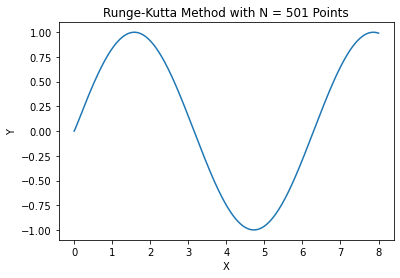

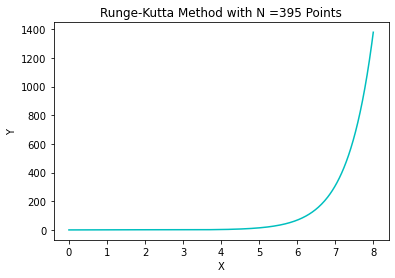

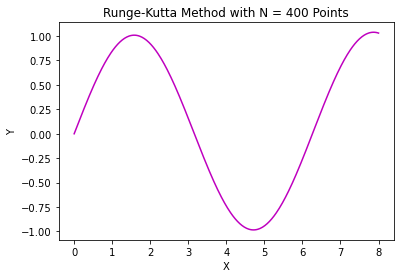

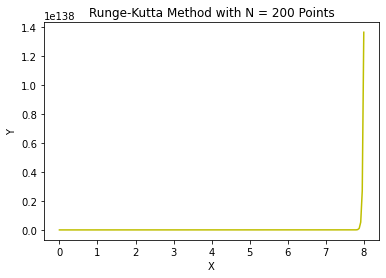

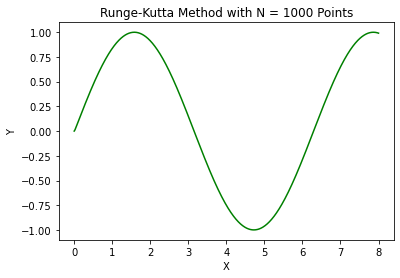

In [18]:
# function for the given ODE
def dydx(x,y):
    return 100*(np.sin(x)-y)

def Runge_Katta(N, func):
    x = np.linspace(0, 8, N)
    
    h = (x[-1]-x[0])/(N-1) # get h

    y = np.zeros(N) # initalizing y
    y[0] = 0 # y condition

    #coefficients for mid-point form: c0, c1, c2 = 0, 1, 0.5

    for i in range(1, N):
        y[i] = y[i-1] + h*func(x[i-1]+h/2, y[i-1]+h/2*func(x[i-1], y[i-1])) # midpoint
    return x, y

# Plot the curves using Runge-Kutta Method for different N values

# N = 501 points
x, y = Runge_Katta(501, dydx)
plt.plot(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Runge-Kutta Method with N = 501 Points")
plt.show()

# N = 395 points
x, y = Runge_Katta(395, dydx)
plt.plot(x, y, "c")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Runge-Kutta Method with N =395 Points")
plt.show()

# N = 400 points
x, y = Runge_Katta(400, dydx)
plt.plot(x, y, "m")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Runge-Kutta Method with N = 400 Points")
plt.show()

# N = 200 points
x, y = Runge_Katta(200, dydx)
plt.plot(x, y, "y")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Runge-Kutta Method with N = 200 Points")
plt.show()

# N = 1000 points
x, y = Runge_Katta(1000, dydx)
plt.plot(x, y, "g")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Runge-Kutta Method with N = 1000 Points")
plt.show()

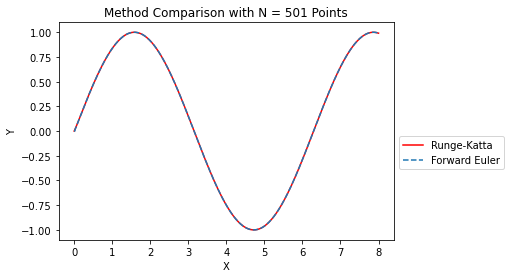

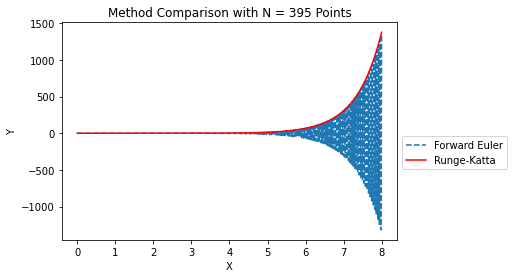

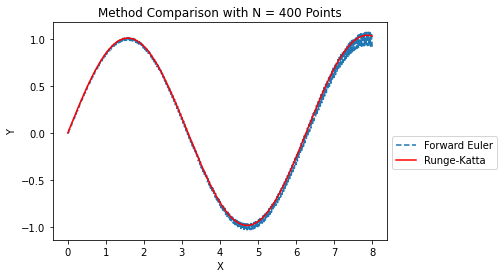

In [6]:
#For comparison, solve the ODE re-using code from your Euler's Method above


# N = 501 points
xR, yR = Runge_Katta(501, dydx)
plt.plot(xR, yR,"r", label= "Runge-Katta")

xEF, yEF = Forward(501, dydx, 0)
plt.plot(xEF, yEF, "--", label = "Forward Euler")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Method Comparison with N = 501 Points")
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()


# N = 395 points
xEF, yEF = Forward(395, dydx, 0)
plt.plot(xEF, yEF, "--", label = "Forward Euler")

xR, yR = Runge_Katta(395, dydx)
plt.plot(xR, yR,"r", label= "Runge-Katta")


plt.xlabel("X")
plt.ylabel("Y")
plt.title("Method Comparison with N = 395 Points")
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()


# N = 400 points
xEF, yEF = Forward(400, dydx, 0)
plt.plot(xEF, yEF, "--", label = "Forward Euler")

xR, yR = Runge_Katta(400, dydx)
plt.plot(xR, yR,"r", label= "Runge-Katta")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Method Comparison with N = 400 Points")
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()


In [7]:
#comment on the results:
# Overall the numerical solutions using each method are pretty similar; showing no differences for 501 points
# and only a small deviation using 400 points

# However, in plot of 395 points there is a significant difference between the solutions at the end.
# The Forward Euler Method fishtails at the end, 
#while the Runge-Katta method follows the positive end of the Forward methods tail.

# Part 3

The following ODEs are a simple model of a viral endemic:

The change in the number of Susceptible individuals (S) depends on their number, the number of Infected individuals (I), and the rate of infection (a)

$\large \frac{dS}{dt} = -aSI$

Similarly, the change in the number of Infected individuals mirrors the S-relation, but also includes a rate of recovery (r) of the Infected individuals (I)

$\large \frac{dI}{dt} = +aSI - rI$

Finally, the number of Recovered individuals (R) who are immune to re-infection changes as a function of the recovery rate and infected individuals

$\large \frac{dR}{dt} = rI$

Consider a city of 100,001 people (such as Kingston), all of whom are susceptible.  

a) If a single infectious individual enters the city at t = 0, use Euler's Method to compute the progression of the epidemic by looking at a period of 90 days. Plot the time-dependent populations on a single graph, and output the final numbers of each population. (Using Floats instead of integers is acceptable)

In the simulation, use the following parameters: 

Without intervention, it has been estimated that an infected Covid 19 individual will infect an average of 2.5 people over a period one week of being contagious (before symptoms).  So, let a = 2.5 / 7 / 100,001 = $3.571 \times 10^{-6}$ /person /day -- the proportion of people in the city an individual infects per day.

The typical recovery time is 14 days, so the rate is r = 1/14 = 0.0714/day.

b) The new Covid 19 variants can be 50% more infectious.  Run the simulation again, but with an infection rate that is 50% larger. (Output final values + graph)

c) Consider the effect of recovered individuals losing their immunity to the virus after a period of 60 days or at a rate of 1/(60 days).  Adjust you differential equations to account for this occurence and run the simulation again using the variant infection rate.  (Output final values + graph)

**QUESTION:  What seems to happen to the populations if immunity is lost?**

Simulation With Recovery Immunity


Current Stats after 90 Days:
People Infected: 4655.0 
People Susceptible: 646.0 
People Recovered: 94700.0

Highest Number of People Infected: 49791.0


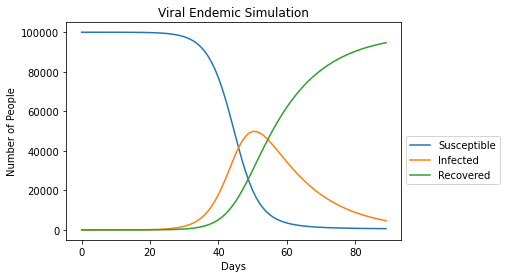

In [8]:
# ** PART A **
print("Simulation With Recovery Immunity\n\n")

population = 100001
a = (2.5/7)/population # given infection rate

r = 1/14 # The typical recovery time is 14 days

days = np.arange(0, 90) # period over 90 days


def Susceptible(S, I): 
    return -a*S*I

def Infected(S, I): 
    return a*S*I - r*I

def Recovered(I): 
    return r*I


def Euler(t, SF, IF, RF): 
    N = len(t) # define N
    h = (days[-1] - days[0])/(N-1) # calc h

    # initalize different arrays for population infection
    S, I, R = np.zeros(N), np.zeros(N), np.zeros(N) 
    
    S[0], I[0], R[0] = population, 1, 0 # given conditions for starting points

    for i in range(1, N): # use Euler Method
        S[i] = S[i-1] + h*SF(S[i-1], I[i-1])

        I[i] = I[i-1] + h*IF(S[i-1], I[i-1])
        
        R[i] = R[i-1] + h*RF(I[i-1])
        
    print('Current Stats after 90 Days:\nPeople Infected:', np.floor(I[-1]),'\nPeople Susceptible:', np.floor(S[-1]),'\nPeople Recovered:', np.floor(R[-1]))
    print('\nHighest Number of People Infected:', np.floor(max(I)))

    return S, I, R

S, I, R = Euler(days, Susceptible, Infected, Recovered)

#plot the simulation
plt.plot(days, S, label="Susceptible")
plt.plot(days, I, label="Infected")
plt.plot(days, R, label="Recovered")
plt.xlabel("Days")
plt.ylabel("Number of People")
plt.title("Viral Endemic Simulation")
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

The new Covid 19 variants can be 50% more infectious


Current Stats after 90 Days:
People Infected: 330.0 
People Susceptible: 422.0 
People Recovered: 99359.0

Highest Number of People Infected: 76346.0


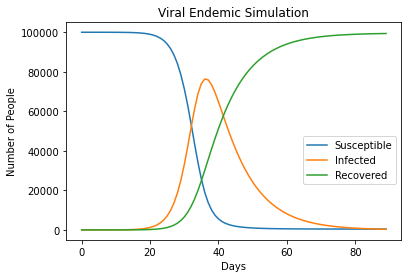

In [9]:
# ** Part B **
print("The new Covid 19 variants can be 50% more infectious\n\n")
def InfectedB(S, I): 
    return 1.5*(a*S*I - r*I)

Sb, Ib, Rb = Euler(days, Susceptible, InfectedB, Recovered)

#plot the simulation
plt.plot(days, Sb, label="Susceptible")
plt.plot(days, Ib, label="Infected")
plt.plot(days, Rb, label="Recovered")
plt.xlabel("Days")
plt.ylabel("Number of People")
plt.title("Viral Endemic Simulation")
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

Recovered individuals losing their immunity to the virus after a period of 60 days


Current Stats after 90 Days:
People Infected: 14292.0 
People Susceptible: 16017.0 
People Recovered: 69692.0

Highest Number of People Infected: 51095.0


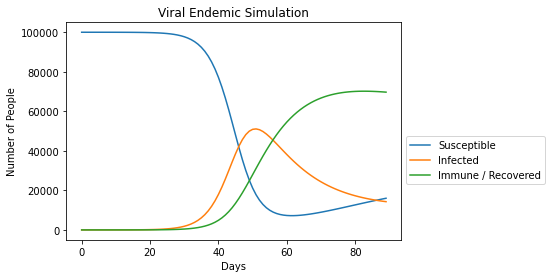

In [10]:
# ** Part C **
print("Recovered individuals losing their immunity to the virus after a period of 60 days\n\n")

def newS(S, I, R): 
    return -a*S*I+R/60

def newI(S, I, R): 
    return a*S*I - r*I

def newR(I,R): 
    return r*I-R/60

def Euler(days): 
    N = len(days)
    h = (days[-1] - days[0])/(N-1) # calc h

    S, I, R = np.zeros(N), np.zeros(N), np.zeros(N)
    S[0], I[0], R[0] = population, 1, 0

    for i in range(1, N): # update the method to include R[] 
        S[i] = S[i-1] + h*newS(S[i-1], I[i-1], R[i-1])

        I[i] = I[i-1] + h*newI(S[i-1], I[i-1], R[i-1])
        
        R[i] = R[i-1] + h*newR(I[i-1], R[i-1])
        
    print('Current Stats after 90 Days:\nPeople Infected:', np.floor(I[-1]),'\nPeople Susceptible:', np.floor(S[-1]),'\nPeople Recovered:', np.floor(R[-1]))
    print('\nHighest Number of People Infected:', np.floor(max(I)))

    return S, I, R


S, I, R = Euler(days)

#plot the simulation
plt.plot(days, S, label="Susceptible")
plt.plot(days, I, label="Infected")
plt.plot(days, R, label="Immune / Recovered")
plt.xlabel("Days")
plt.ylabel("Number of People")
plt.title("Viral Endemic Simulation")
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

**QUESTION:  What seems to happen to the populations if immunity is lost?**
when Immunity was lost after the 60 day period the number of people susceptible started increasing, while the number of people immune and / or recovered from the virus started to slow down. As well one can see that the infection rate was decreasing more slowly after the 60 days. If one were to increase the period the infection rate may increase again.

Current Stats after 90 Days:
People Infected: 15257.0 
People Susceptible: 19729.0 
People Recovered: 65014.0

Highest Number of People Infected: 51095.0


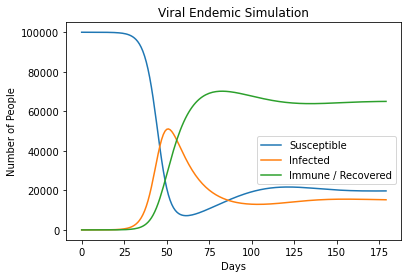

**One can see that after about 100 days the infection rate goes back up before flattening**


In [11]:
days = np.arange(0, 180) # period over 90 days

S, I, R = Euler(days)

#plot the simulation
plt.plot(days, S, label="Susceptible")
plt.plot(days, I, label="Infected")
plt.plot(days, R, label="Immune / Recovered")
plt.xlabel("Days")
plt.ylabel("Number of People")
plt.title("Viral Endemic Simulation")
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

print("**One can see that after about 100 days the infection rate goes back up before flattening**")

# Part 4

Consider a mass on a spring sliding horizontally of a frictionless table.  The differential equation that describes this motion is

$m \frac{d^2x}{dt^2} = -kx$

Consider a block of mass 2~kg and a spring constant of 225 N/m.  If at time t=0, the block is at rest and displaced by a distance of 10cm, code a solution for the time dependence of the block using the algorithm discussed in class.  Plot the curve for time $0 \leq t \leq 5s$, and use np.fft.fft() to verify the frequency $\omega = \sqrt{\frac{k}{m}}$. Use 501 points for the solution.

To the right hand side of the differential equation, add an external force of the form:

$F_{ext} = 5 \cos(\omega t)$

Then solve the ODE with this external force for $5 \leq \omega \leq 15$ in steps of 0.1.  For each $\omega$, extract the maximum displacement using np.amax().  Plot the max displacement vs. $\omega$ to observe the resonant excitation that corresponds with the frequency from your FFT.

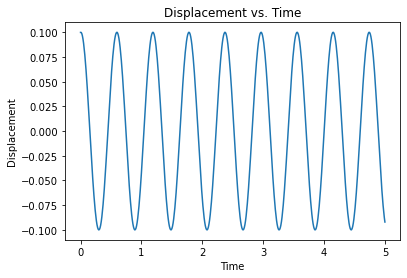

In [12]:
# ** update code ***
# Given starting conditions
x_0 = 0.1
v_0 = 0

# given constants
mass = 2 # mass
k = 225 # spring const

time = np.linspace(0, 5, 501)

def d2xdt(x): # Given 2nd diff
    return -k*x/mass

def ODE_Solve(func): # function to solve the ODE
    N = len(time)
    h = (time[-1]-time[0])/(N-1) # calc h

    xpts1, xpts2 = np.zeros(N), np.zeros(N)
    xpts1[0], xpts2[0] = x_0, v_0 # initial conditions

    for i in range(1, N): # calc x
        xpts1[i] = xpts1[i-1] + h*xpts2[i-1]
        xpts2[i] = xpts2[i-1] + h*func(xpts1[i])
        
    return xpts1


disp = ODE_Solve(d2xdt) # call the function -> displacement
plt.plot(time, disp )
plt.title("Displacement vs. Time")
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.show()

In [13]:
# compary the theorectical freq with the observed one

omega_theory = (k/mass)**0.5 # calc theorectical ang freq

# calc ang freq using my FFT
dispF = np.fft.fft(ODE_Solve(d2xdt))
indexF = np.argmax(dispF)
freqF = np.fft.fftfreq(len(ODE_Solve(d2xdt)), 5/len(ODE_Solve(d2xdt)))
omega_obs = 2*np.pi*freqF[indexF]

print("Expected Frequency:", omega_theory)
print("FFT Frequency Observed:",omega_obs)

Expected Frequency: 10.606601717798213
FFT Frequency Observed: 10.053096491487338


Max Displacement Array
 [0.1        0.1        0.1        0.10009584 0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.10015087 0.1        0.1        0.1
 0.1        0.10011381 0.1        0.10018153 0.10102373 0.10209051
 0.10702207 0.11202089 0.12113433 0.12799025 0.13764321 0.1482377
 0.15910544 0.17026126 0.18324733 0.1950305  0.21521811 0.23620633
 0.25693695 0.27813127 0.31265682 0.34686206 0.3879828  0.43919802
 0.50450582 0.58623831 0.67875775 0.8110517  0.91634566 1.00674013
 1.07828192 1.12785521 1.15675448 1.16119067 1.14179855 1.10063977
 1.04028877 0.96170565 0.86801149 0.76261915 0.67599857 0.60983855
 0.55380125 0.51205129 0.47103765 0.44507896 0.4177437  0.38936296
 0.37288487 0.35840104 0.34307607 0.32793119 0.31707531 0.29881731
 0.29228626 0.28589795 0.2750699  0.26911315 0.2624749  0.25561743
 0.24900836 0.24186955 0.23474999 0.23220569 0.22878196 0.22414991


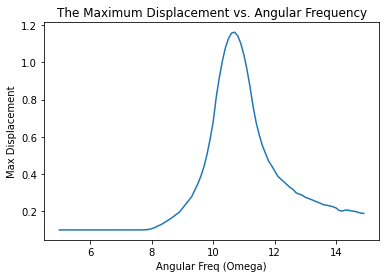

The Peak of Maximum Displacement is at an angular Freq:  10.69999999999998 
This is the resonant excitation that corresponds with the frequency from my FFT


In [14]:
# Now adding the external force to the soln
omega = np.arange(5, 15, 0.1)

def Force(x, omega, time): 
    return 5*np.cos(omega*time)-(k/mass)*x

def new_ODE(omega, func):
    N = len(time)
    h = (time[-1]-time[0])/(N-1)

    xpts1, xpts2 = np.zeros(N), np.zeros(N)
    xpts1[0], xpts2[0] = x_0, v_0

    for i in range(1, N):
        xpts1[i] = xpts1[i-1] + h*xpts2[i-1]
        xpts2[i] = xpts2[i-1] + h*func(xpts1[i], omega, time[i])
    return xpts1

# find max displacement
dispMax = np.zeros(len(omega))

for i in range(len(omega)):
    dispMax[i] = np.amax(new_ODE(omega[i], Force))
    
print("Max Displacement Array\n",dispMax)

# plot
plt.plot(omega, dispMax)
plt.title("The Maximum Displacement vs. Angular Frequency")
plt.xlabel("Angular Freq (Omega)")
plt.ylabel("Max Displacement")
plt.show()

index = np.argmax((dispMax))

print("The Peak of Maximum Displacement is at an angular Freq: ", omega[index],"\nThis is the resonant excitation that corresponds with the frequency from my FFT" )

# Part 5

Part 5 tbd. In seperate Notebook

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.

In [15]:
# All code was written by Nathan Pacey. Topics were discussed with Stuart Gaherty, Conner Legg and Ekin Yelken.